# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its
ability to answer questions definitively. So let's take what you've learned 
about Python requests, APIs, and JSON traversals to answer a fundamental
question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. 
   **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the
   Python Challenges. Use folder names corresponding to the challenges: **WeatherPy**.

        
4. Inside the folder that you just created, add new files called `WeatherPy.ipynb` 
   and `VacationPy.ipynb`. These will be the main scripts to run for each
   analysis.

5. Push the above changes to GitHub.

*******************************************************


## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 
500+ cities across the world of varying distance from the equator. 
To accomplish this, you'll be utilizing a [simple Python library]
(https://pypi.python.org/pypi/citipy), 
the [OpenWeatherMap API](https://openweathermap.org/api), and a little 
common sense to create a representative model of weather across world cities.

Your first requirement is to create a series of scatter plots to showcase 
the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and 
analyzing.

Your second requirement is to run linear regression on each relationship, 
only this time separating them into Northern Hemisphere (greater than 
or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 
degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling 
such as any relationships you notice and any other analysis you may have.

**Optional** You will be creating multiple linear regression plots. 
To optimize your code, write a function that creates the linear regression plots.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on 
  latitude and longitude.
* Perform a weather check on each of the cities using a series of successive 
  API calls.
* Include a print log of each city as it's being processed with the city 
  number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.





# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv
import json
import urllib
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

569

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# OpenWeatherMap API Key
api_key = weather_api_key = "9dc1a0bf941ca8432869138d960cbd37"

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

url, api_key

('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37',
 '9dc1a0bf941ca8432869138d960cbd37')

In [8]:
# I was having some trouble with the appropriate way to perform the api calls so I have two versions thus far!!!!
# Making an empty list to which we will append information obtained from these api calls and the
# output and enter them into lists and then into a DataFrame for further analyses and visualization

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=faya
Processing Record 2 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=thompson
Processing Record 3 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=albany
Processing Record 4 of Set 1 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=torbay
Processing Record 5 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=carnarvon
Processing Record 6 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=port%20alfred
Processing Record 7 of Set 1 | eas

Processing Record 5 of Set 2 | phonhong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=phonhong
Processing Record 6 of Set 2 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=lorengau
Processing Record 7 of Set 2 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=vao
Processing Record 8 of Set 2 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=upernavik
Processing Record 9 of Set 2 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=derzhavinsk
Processing Record 10 of Set 2 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=fairbanks
Processing Record 11 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 9 of Set 3 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=yerbogachen
Processing Record 10 of Set 3 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=salalah
Processing Record 11 of Set 3 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=sentyabrskiy
City not found...
Processing Record 12 of Set 3 | rolim de moura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=rolim%20de%20moura
City not found...
Processing Record 13 of Set 3 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=nanortalik
Processing Record 14 of Set 3 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=new%20norfolk
Process

Processing Record 12 of Set 4 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=husavik
Processing Record 13 of Set 4 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=samarai
Processing Record 14 of Set 4 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=yar-sale
Processing Record 15 of Set 4 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=amahai
Processing Record 16 of Set 4 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=avarua
Processing Record 17 of Set 4 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=camacha
Processing Record 18 of Set 4 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 17 of Set 5 | nagato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=nagato
Processing Record 18 of Set 5 | jutai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=jutai
Processing Record 19 of Set 5 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=leshukonskoye
Processing Record 20 of Set 5 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=tuatapere
Processing Record 21 of Set 5 | turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=turukhansk
Processing Record 22 of Set 5 | juba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=juba
Processing Record 23 of Set 5 | ararat
http://api.openweathermap.org/data/2.5/weathe

Processing Record 22 of Set 6 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hay%20river
Processing Record 23 of Set 6 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=laguna
Processing Record 24 of Set 6 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=prince%20rupert
Processing Record 25 of Set 6 | mahdalynivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=mahdalynivka
Processing Record 26 of Set 6 | chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=chumikan
Processing Record 27 of Set 6 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=muros
Processing Record 28 of Set 6 | lavrentiya
http://api.openweathermap

Processing Record 25 of Set 7 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=samusu
City not found...
Processing Record 26 of Set 7 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=qaqortoq
Processing Record 27 of Set 7 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=bolungarvik
City not found...
Processing Record 28 of Set 7 | krishnagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=krishnagiri
Processing Record 29 of Set 7 | gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=gao
Processing Record 30 of Set 7 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=moron
Processing Record 31 of Set 7 | el mahalla el kubra
ht

Processing Record 29 of Set 8 | ramasukha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=ramasukha
City not found...
Processing Record 30 of Set 8 | namwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=namwala
Processing Record 31 of Set 8 | helong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=helong
Processing Record 32 of Set 8 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=okhotsk
Processing Record 33 of Set 8 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=kaeo
Processing Record 34 of Set 8 | arica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=arica
Processing Record 35 of Set 8 | cayenne
http://api.openweathermap.org/data/2.5/weath

Processing Record 32 of Set 9 | bantou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=bantou
Processing Record 33 of Set 9 | hangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=hangu
Processing Record 34 of Set 9 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=tsihombe
City not found...
Processing Record 35 of Set 9 | lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=lincoln
Processing Record 36 of Set 9 | koutiala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=koutiala
Processing Record 37 of Set 9 | port said
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=port%20said
Processing Record 38 of Set 9 | grindavik
http://api.openweathermap.org/

Processing Record 36 of Set 10 | angoram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=angoram
Processing Record 37 of Set 10 | aviemore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=aviemore
Processing Record 38 of Set 10 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=lebu
Processing Record 39 of Set 10 | santa rosalia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=santa%20rosalia
Processing Record 40 of Set 10 | saint-donat-de-montcalm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=saint-donat-de-montcalm
Processing Record 41 of Set 10 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=kasongo-lunda
Processing Record 42 of Set 10 | s

Processing Record 40 of Set 11 | haldensleben
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=haldensleben
Processing Record 41 of Set 11 | otavi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=otavi
Processing Record 42 of Set 11 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=chapais
Processing Record 43 of Set 11 | halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=halalo
City not found...
Processing Record 44 of Set 11 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=usinsk
Processing Record 45 of Set 11 | kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9dc1a0bf941ca8432869138d960cbd37&q=kiunga
Processing Record 46 of Set 11 | jalcocotan
http://api.openweathermap.

In [9]:
# place above data into a DataFrame
city_data_pd = pd.DataFrame(city_data)

In [10]:
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.39,42.45,73.40,78,40,16.11,SA,1595433966
1,thompson,55.74,-97.86,73.40,60,20,8.05,CA,1595433966
2,albany,42.60,-73.97,82.99,62,56,3.83,US,1595433966
3,torbay,47.67,-52.73,77.00,49,40,21.92,CA,1595433966
4,carnarvon,-24.87,113.63,64.40,100,0,9.17,AU,1595433821
...,...,...,...,...,...,...,...,...,...
513,thomaston,32.89,-84.33,88.00,62,1,3.36,US,1595434016
514,poso,-1.40,120.75,77.41,77,98,7.67,ID,1595434016
515,vaitape,-16.52,-151.75,77.68,77,53,18.79,PF,1595434016
516,mogadishu,2.04,45.34,77.05,79,89,22.86,SO,1595434016


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()



City          518
Lat           518
Lng           518
Max Temp      518
Humidity      518
Cloudiness    518
Wind Speed    518
Country       518
Date          518
dtype: int64

In [12]:
# Display the City Data Frame
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.39,42.45,73.40,78,40,16.11,SA,1595433966
1,thompson,55.74,-97.86,73.40,60,20,8.05,CA,1595433966
2,albany,42.60,-73.97,82.99,62,56,3.83,US,1595433966
3,torbay,47.67,-52.73,77.00,49,40,21.92,CA,1595433966
4,carnarvon,-24.87,113.63,64.40,100,0,9.17,AU,1595433821
...,...,...,...,...,...,...,...,...,...
513,thomaston,32.89,-84.33,88.00,62,1,3.36,US,1595434016
514,poso,-1.40,120.75,77.41,77,98,7.67,ID,1595434016
515,vaitape,-16.52,-151.75,77.68,77,53,18.79,PF,1595434016
516,mogadishu,2.04,45.34,77.05,79,89,22.86,SO,1595434016


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# First filter out those rows which the rows don't contain any data

city_data_pd_dropna = city_data_pd.dropna(how = 'all') 
city_data_pd_dropna  



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.39,42.45,73.40,78,40,16.11,SA,1595433966
1,thompson,55.74,-97.86,73.40,60,20,8.05,CA,1595433966
2,albany,42.60,-73.97,82.99,62,56,3.83,US,1595433966
3,torbay,47.67,-52.73,77.00,49,40,21.92,CA,1595433966
4,carnarvon,-24.87,113.63,64.40,100,0,9.17,AU,1595433821
...,...,...,...,...,...,...,...,...,...
513,thomaston,32.89,-84.33,88.00,62,1,3.36,US,1595434016
514,poso,-1.40,120.75,77.41,77,98,7.67,ID,1595434016
515,vaitape,-16.52,-151.75,77.68,77,53,18.79,PF,1595434016
516,mogadishu,2.04,45.34,77.05,79,89,22.86,SO,1595434016


In [23]:
#  Get the indices of cities that have humidity over 100%.
#  Get the indices of cities that have humidity over 100%.
# Filter all rows for which the cities' humidities are = 100%
city_data_pd_filtered = city_data_pd[(city_data_pd["Humidity"] == 100)]
  
# Print the new dataframe 
city_data_pd_filtered 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,carnarvon,-24.87,113.63,64.40,100,0,9.17,AU,1595433821
16,mae sai,20.43,99.88,78.80,100,20,0.96,TH,1595433967
20,vaini,-21.20,-175.20,59.00,100,20,2.24,TO,1595433967
46,eureka,40.80,-124.16,57.00,100,49,4.05,US,1595433920
67,punta arenas,-53.15,-70.92,23.00,100,75,6.93,CL,1595433713
130,fortuna,40.60,-124.16,57.00,100,90,3.36,US,1595433977
175,hasaki,35.73,140.83,75.20,100,75,3.36,JP,1595433960
188,north bend,43.41,-124.22,63.00,100,90,8.05,US,1595433975
193,alofi,-19.06,-169.92,73.40,100,28,6.93,NU,1595433983
327,yoichi,43.20,140.77,69.01,100,100,7.09,JP,1595433997


In [20]:
city_data_pd_filtered.shape

(13, 9)

In [19]:
# Filter all rows for which city's have a humidity equal to 100%
city_data_pd.drop(city_data_pd[city_data_pd["Humidity"] >= 100].index, inplace = False) 
  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.39,42.45,73.40,78,40,16.11,SA,1595433966
1,thompson,55.74,-97.86,73.40,60,20,8.05,CA,1595433966
2,albany,42.60,-73.97,82.99,62,56,3.83,US,1595433966
3,torbay,47.67,-52.73,77.00,49,40,21.92,CA,1595433966
4,carnarvon,-24.87,113.63,64.40,100,0,9.17,AU,1595433821
...,...,...,...,...,...,...,...,...,...
513,thomaston,32.89,-84.33,88.00,62,1,3.36,US,1595434016
514,poso,-1.40,120.75,77.41,77,98,7.67,ID,1595434016
515,vaitape,-16.52,-151.75,77.68,77,53,18.79,PF,1595434016
516,mogadishu,2.04,45.34,77.05,79,89,22.86,SO,1595434016


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# modDfObj = dfObj.drop(['a' , 'b'])    2)  modDfObj = dfObj.drop([dfObj.index[0] , dfObj.index[1]]) or:

clean_city_data = city_data_pd.drop([4, 16, 20, 46, 67, 130, 175, 188, 193, 327, 384, 452, 474])
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.39,42.45,73.40,78,40,16.11,SA,1595433966
1,thompson,55.74,-97.86,73.40,60,20,8.05,CA,1595433966
2,albany,42.60,-73.97,82.99,62,56,3.83,US,1595433966
3,torbay,47.67,-52.73,77.00,49,40,21.92,CA,1595433966
5,port alfred,-33.59,26.89,62.76,84,0,2.01,ZA,1595433966
...,...,...,...,...,...,...,...,...,...
513,thomaston,32.89,-84.33,88.00,62,1,3.36,US,1595434016
514,poso,-1.40,120.75,77.41,77,98,7.67,ID,1595434016
515,vaitape,-16.52,-151.75,77.68,77,53,18.79,PF,1595434016
516,mogadishu,2.04,45.34,77.05,79,89,22.86,SO,1595434016


In [26]:
# Extract relevant fields from the data frame-->done


# Export the City_Data into a csv
clean_city_data.to_csv("clean_city_data.csv",encoding="utf-8",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

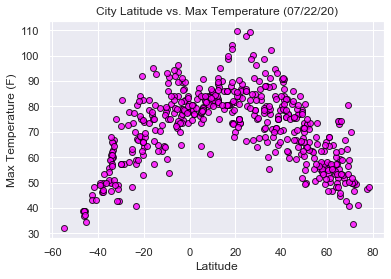

In [28]:
# Build scatter plot for latitude vs temperature
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",c = "magenta", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()



## Latitude vs. Humidity Plot

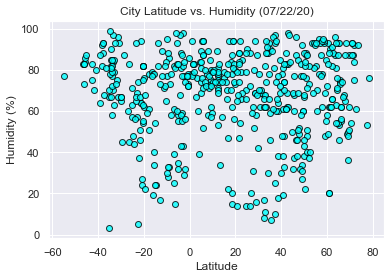

In [32]:
# Build the scatter plots for each city types
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", c = "cyan",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()



## Latitude vs. Cloudiness Plot

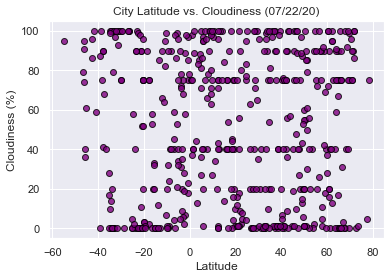

In [31]:
# Build the scatter plots for each city types
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", c = "purple",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

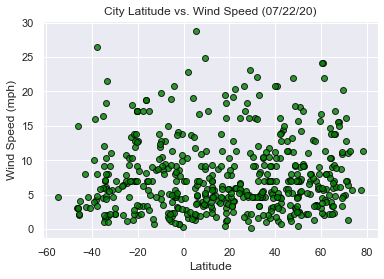

In [30]:
# Build the scatter plots for each city types
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", c = "green", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression